In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math as mt
from math import sqrt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/Admin/Desktop/Proj1.csv')

In [3]:
Dataset = df.copy()

In [4]:
Dataset.head()  #to get an idea on the features of the dataset

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [5]:
print('Shape of the Dataset before dropping duplicates:',Dataset.shape)

Shape of the Dataset before dropping duplicates: (1100, 14)


In [6]:
#As we could see there are 1100 rows and 14 columns(features) before dropping duplicate

In [7]:
Dataset.info()  #To get an idea of the features which might have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [8]:
#We can see from above execution that Sample ID can be dropped as it has only Null values and also SI No.
#as SI No. wont be useful for Model prediction

In [9]:
Dataset = Dataset.drop(['Sample ID','Sl No'],axis =1)

In [10]:
Dataset.info()  #We can see that there is no null value for any of the feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [11]:
Dataset= Dataset.drop_duplicates()
print('Shape of the Dataset after dropping duplicates:',Dataset.shape)

Shape of the Dataset after dropping duplicates: (1077, 12)


In [12]:
#Applyinng Categorical encoding for variables
LE = LabelEncoder()

In [13]:
Dataset['Gender']= LE.fit_transform(Dataset['Gender'])#Applying Categorical encoder coding on Categorical variable GENDER

In [14]:
Dataset.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [15]:
Dataset['Gender'].unique()

array([0, 1])

In [16]:
Dataset.loc[Dataset['Gender'] == 'Male']

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts


In [17]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1077 non-null   int64  
 1   Gender                           1077 non-null   int32  
 2   inter canine distance intraoral  1077 non-null   float64
 3   intercanine distance casts       1077 non-null   float64
 4   right canine width intraoral     1077 non-null   float64
 5   right canine width casts         1077 non-null   float64
 6   left canine width intraoral      1077 non-null   float64
 7   left canine width casts          1077 non-null   float64
 8   right canine index intra oral    1077 non-null   float64
 9   right canine index casts         1077 non-null   float64
 10  left canine index intraoral      1077 non-null   float64
 11  left canine index casts          1077 non-null   float64
dtypes: float64(10), int3

In [18]:
Dataset.shape

(1077, 12)

In [19]:
Dataset.describe()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,21.62117,0.501393,25.981188,25.869842,6.560149,6.561671,6.667604,6.673120,0.253104,0.252319,0.256456,0.256362
std,2.07289,0.500230,1.309747,1.867892,0.378103,0.376608,0.375512,0.376803,0.015395,0.012894,0.012358,0.012374
min,18.00000,0.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,20.00000,0.000000,24.990000,24.970000,6.290000,6.300000,6.400000,6.400000,0.242000,0.242000,0.247000,0.247000
50%,22.00000,1.000000,25.890000,25.890000,6.520000,6.520000,6.660000,6.670000,0.253000,0.253000,0.255000,0.255000
75%,23.00000,1.000000,26.980000,26.980000,6.800000,6.800000,6.900000,6.920000,0.262000,0.261000,0.264000,0.264000
max,25.00000,1.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


Total Male: 540
Total Female: 537


<AxesSubplot:ylabel=' '>

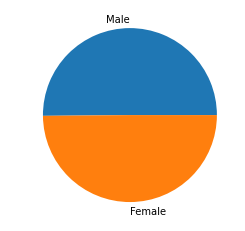

In [20]:
# check for relative proportion 
print("Total Male: " + str(len(Dataset[Dataset['Gender'] == 1])))
print("Total Female: " + str(len(Dataset[Dataset['Gender'] == 0])))


# To see how small are the number of Fraud transactions
data_pi = Dataset.copy()
data_pi[" "] = np.where(data_pi['Gender'] == 1 ,  "Male", "Female")

# plot a pie chart
%matplotlib inline
data_pi[" "].value_counts().plot(kind="pie")

In [21]:
#our data is close to evenly distribution

In [22]:
DF = Dataset.copy()
New_DF = Dataset.copy()

In [23]:
#Applying Chi-square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
x = New_DF.drop("Gender",axis = 1)
y= New_DF["Gender"]
bestfeatures = SelectKBest(score_func = chi2,k=7)
fit =bestfeatures.fit(x,y)

In [25]:
feature_scores = pd.concat([pd.DataFrame(x.columns),pd.DataFrame(fit.scores_)],axis = 1)
feature_scores.columns = ["fetaures","scores"]
feature_scores.sort_values(by = 'scores',ascending = False)

,fetaures,scores
6,left canine width casts,9.288489
5,left canine width intraoral,8.943845
1,inter canine distance intraoral,8.051697
3,right canine width intraoral,7.284305
4,right canine width casts,7.228491
2,intercanine distance casts,4.463575
0,Age,3.298344
10,left canine index casts,0.096843
9,left canine index intraoral,0.095045
8,right canine index casts,0.063348


In [26]:
feature_scores.nlargest(7,'scores')

,fetaures,scores
6,left canine width casts,9.288489
5,left canine width intraoral,8.943845
1,inter canine distance intraoral,8.051697
3,right canine width intraoral,7.284305
4,right canine width casts,7.228491
2,intercanine distance casts,4.463575
0,Age,3.298344


In [27]:
Highly_Related_Features = feature_scores.nlargest(3,'scores')
print('Highly Related Features which can be removed:',Highly_Related_Features)

Highly Related Features which can be removed:                           fetaures    scores
6          left canine width casts  9.288489
5      left canine width intraoral  8.943845
1  inter canine distance intraoral  8.051697


In [28]:
New_DF = New_DF.drop(['left canine width casts','left canine width intraoral','inter canine distance intraoral'],axis =1)

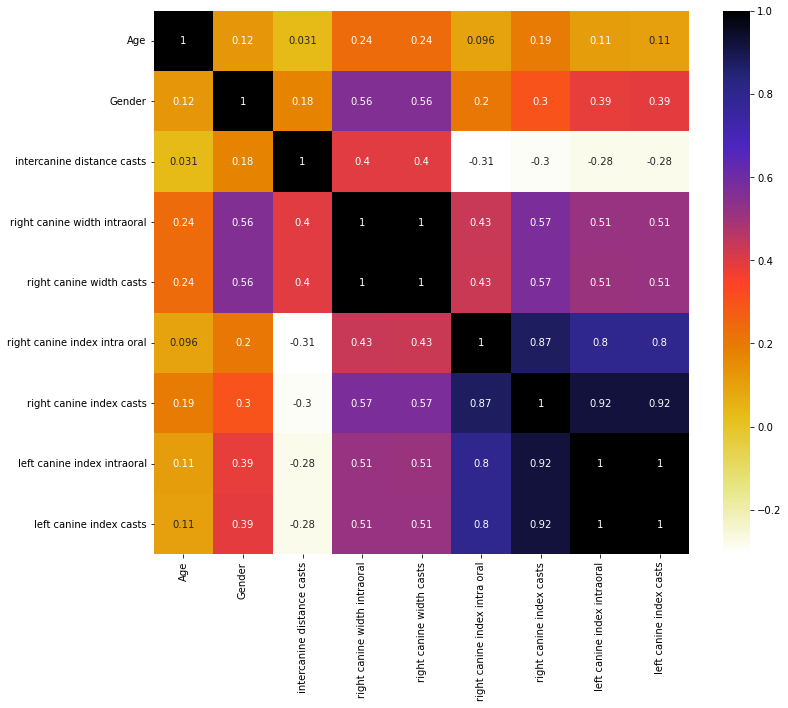

In [29]:
plt.figure(figsize = (12,10))
sns.heatmap(New_DF.corr(), annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [30]:
#After performing Chi square tests we could see still we have some highlt correlated feature.
#Hence we need to perform Correlation

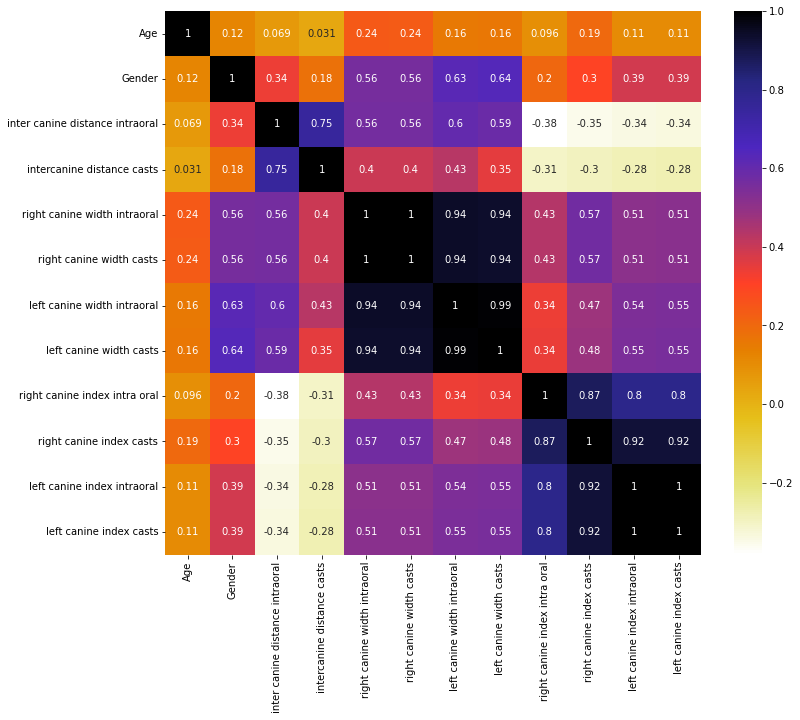

In [31]:
plt.figure(figsize = (12,10))
sns.heatmap(DF.corr(), annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [32]:
#DF.corr()

In [33]:
#Detecting Highly co-related Feature and dropping them
def correlation(dataset,Threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>Threshold:
                columname = corr_matrix.columns[i]
                col_corr.add(columname)
    return col_corr   

In [34]:
correlated_features = correlation(DF,0.95)
print('No. of High Co-related features:',len(correlated_features))
print('Highly co-related Features are:',correlated_features)

No. of High Co-related features: 3
Highly co-related Features are: {'left canine width casts', 'left canine index casts', 'right canine width casts'}


In [35]:
#left canine index casts,right canine width casts and left canine width casts can be dropped from the features for better predictio
#due to their high collinerity

DF = DF.drop(['left canine index casts','left canine width casts','right canine width casts'],axis =1)

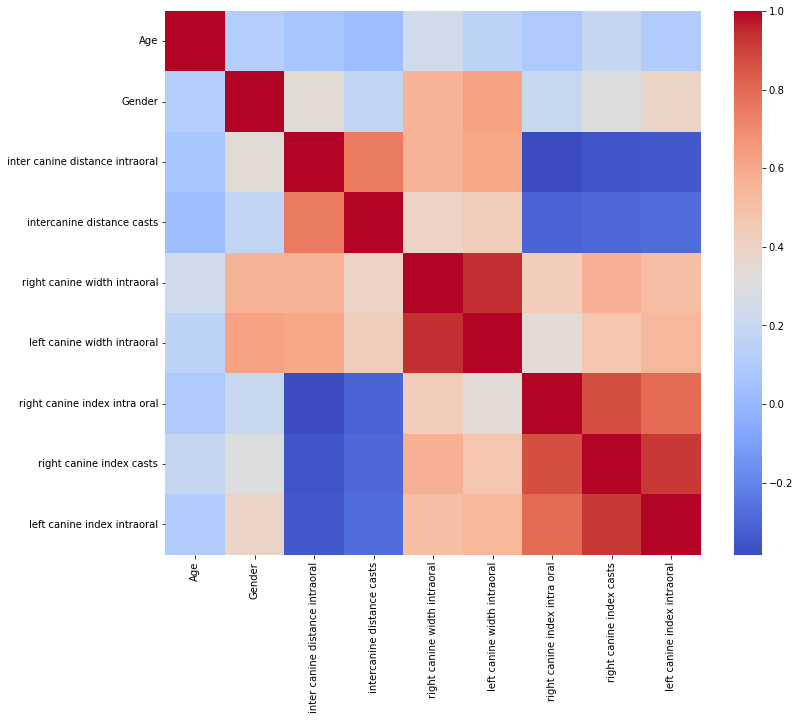

In [36]:
plt.figure(figsize = (12,10))
sns.heatmap(DF.corr(),  cmap = 'coolwarm')
plt.show()

In [37]:
#Shape of Dataset before removing outliers
DF.shape

(1077, 9)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'inter canine distance intraoral'),
  Text(3, 0, 'intercanine distance casts'),
  Text(4, 0, 'right canine width intraoral'),
  Text(5, 0, 'left canine width intraoral'),
  Text(6, 0, 'right canine index intra oral'),
  Text(7, 0, 'right canine index casts'),
  Text(8, 0, 'left canine index intraoral')])

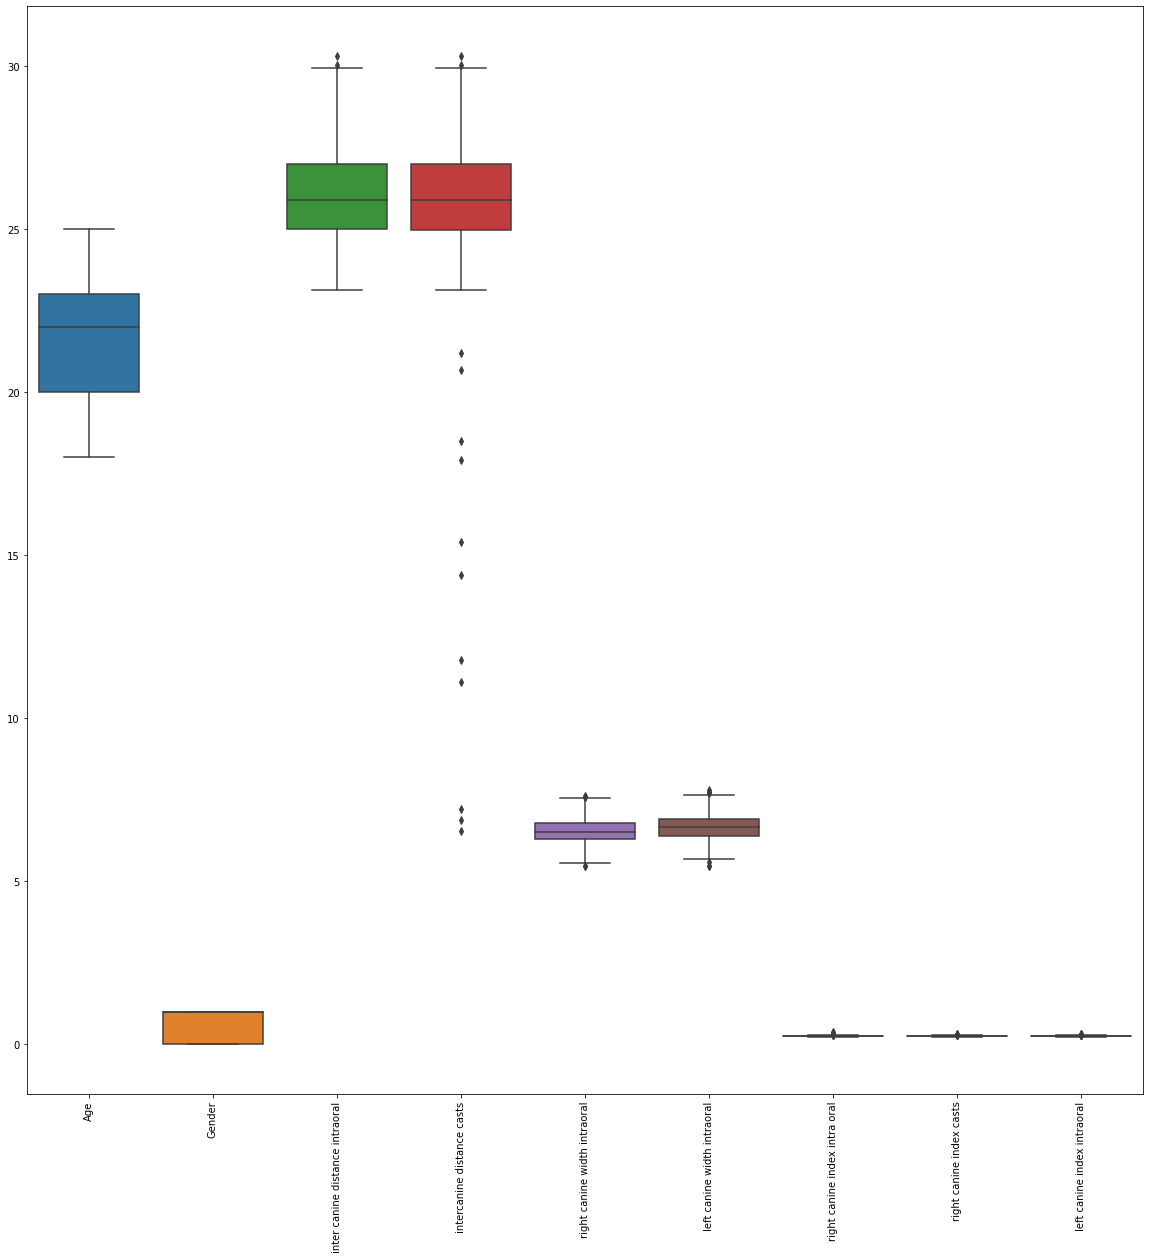

In [39]:
plt.figure(figsize=(20,20)) 
sns.boxplot(data=DF)
plt.xticks(rotation=90)

In [40]:
DF.quantile([.25,.5,.75],axis = 0)

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,right canine index casts,left canine index intraoral
0.25,20.0,0.0,24.99,24.97,6.29,6.40,0.242,0.242,0.247
0.50,22.0,1.0,25.89,25.89,6.52,6.66,0.253,0.253,0.255
0.75,23.0,1.0,26.98,26.98,6.80,6.90,0.262,0.261,0.264


In [41]:
DF.describe()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,right canine index casts,left canine index intraoral
count,1077.00000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,21.62117,0.501393,25.981188,25.869842,6.560149,6.667604,0.253104,0.252319,0.256456
std,2.07289,0.500230,1.309747,1.867892,0.378103,0.375512,0.015395,0.012894,0.012358
min,18.00000,0.000000,23.120000,6.540000,5.460000,5.460000,0.223000,0.223000,0.223000
25%,20.00000,0.000000,24.990000,24.970000,6.290000,6.400000,0.242000,0.242000,0.247000
50%,22.00000,1.000000,25.890000,25.890000,6.520000,6.660000,0.253000,0.253000,0.255000
75%,23.00000,1.000000,26.980000,26.980000,6.800000,6.900000,0.262000,0.261000,0.264000
max,25.00000,1.000000,30.310000,30.310000,7.610000,7.810000,0.363000,0.302000,0.305000


In [42]:
colom = DF.columns
colom

Index(['Age', 'Gender', 'inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'left canine width intraoral', 'right canine index intra oral',
       'right canine index casts', 'left canine index intraoral'],
      dtype='object')

In [43]:
IQR = DF['inter canine distance intraoral'].quantile(0.75) - DF['inter canine distance intraoral'].quantile(0.25)
Upper_Limit = DF['inter canine distance intraoral'].quantile(0.75) + 1.5 * IQR
Lower_Limit = DF['inter canine distance intraoral'].quantile(0.25) - 1.5 * IQR

print('IQR is:',IQR)
print('Upper Limit is:',Upper_Limit)
print('Lower Limit is:',Lower_Limit)

IQR is: 1.990000000000002
Upper Limit is: 29.965000000000003
Lower Limit is: 22.004999999999995


In [44]:
Data = DF['inter canine distance intraoral']

In [45]:
outlier = []
for x in Data:
    if (x>Upper_Limit) or (x<Lower_Limit):
        outlier.append(x)
print(' outlier in the dataset is', outlier)

 outlier in the dataset is [30.31, 30.03]


In [46]:
def outliers(df,field):
    IQR = df[field].quantile(0.75) - df[field].quantile(0.25)
    Upper_Limit = df[field].quantile(0.65) + 1.5 * IQR
    Lower_Limit = df[field].quantile(0.25) - 1.5 * IQR
    ls = df.index[(df[field]<Lower_Limit) | (df[field]>Upper_Limit)]
    return ls

index_list = []

for feature in colom:
    index_list.extend(outliers(DF,feature))



In [47]:
index_list 

[66,
 760,
 762,
 66,
 90,
 760,
 762,
 1000,
 1001,
 1002,
 1003,
 1004,
 1005,
 1006,
 1007,
 1008,
 1009,
 45,
 54,
 61,
 559,
 691,
 700,
 705,
 710,
 712,
 715,
 717,
 731,
 736,
 767,
 45,
 54,
 61,
 550,
 559,
 640,
 641,
 644,
 645,
 649,
 666,
 691,
 700,
 710,
 712,
 715,
 717,
 731,
 34,
 57,
 422,
 423,
 428,
 441,
 442,
 444,
 446,
 447,
 485,
 613,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 57,
 613,
 671,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 57,
 62,
 613,
 671,
 673,
 677,
 679,
 686,
 692,
 693,
 706,
 721,
 723,
 724,
 725,
 728,
 729,
 739]

In [48]:
def remove_outliers(df,ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [49]:
DF = remove_outliers(DF,index_list)

In [50]:
#Shape of dataset after removing outliers
DF.shape

(1014, 9)

In [51]:
#check = 30.31
#check

In [52]:
#if check not in DF.values :
#    print("\nFor Loop worked")
#else :
#    print("\nFor Loop failed")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'inter canine distance intraoral'),
  Text(3, 0, 'intercanine distance casts'),
  Text(4, 0, 'right canine width intraoral'),
  Text(5, 0, 'left canine width intraoral'),
  Text(6, 0, 'right canine index intra oral'),
  Text(7, 0, 'right canine index casts'),
  Text(8, 0, 'left canine index intraoral')])

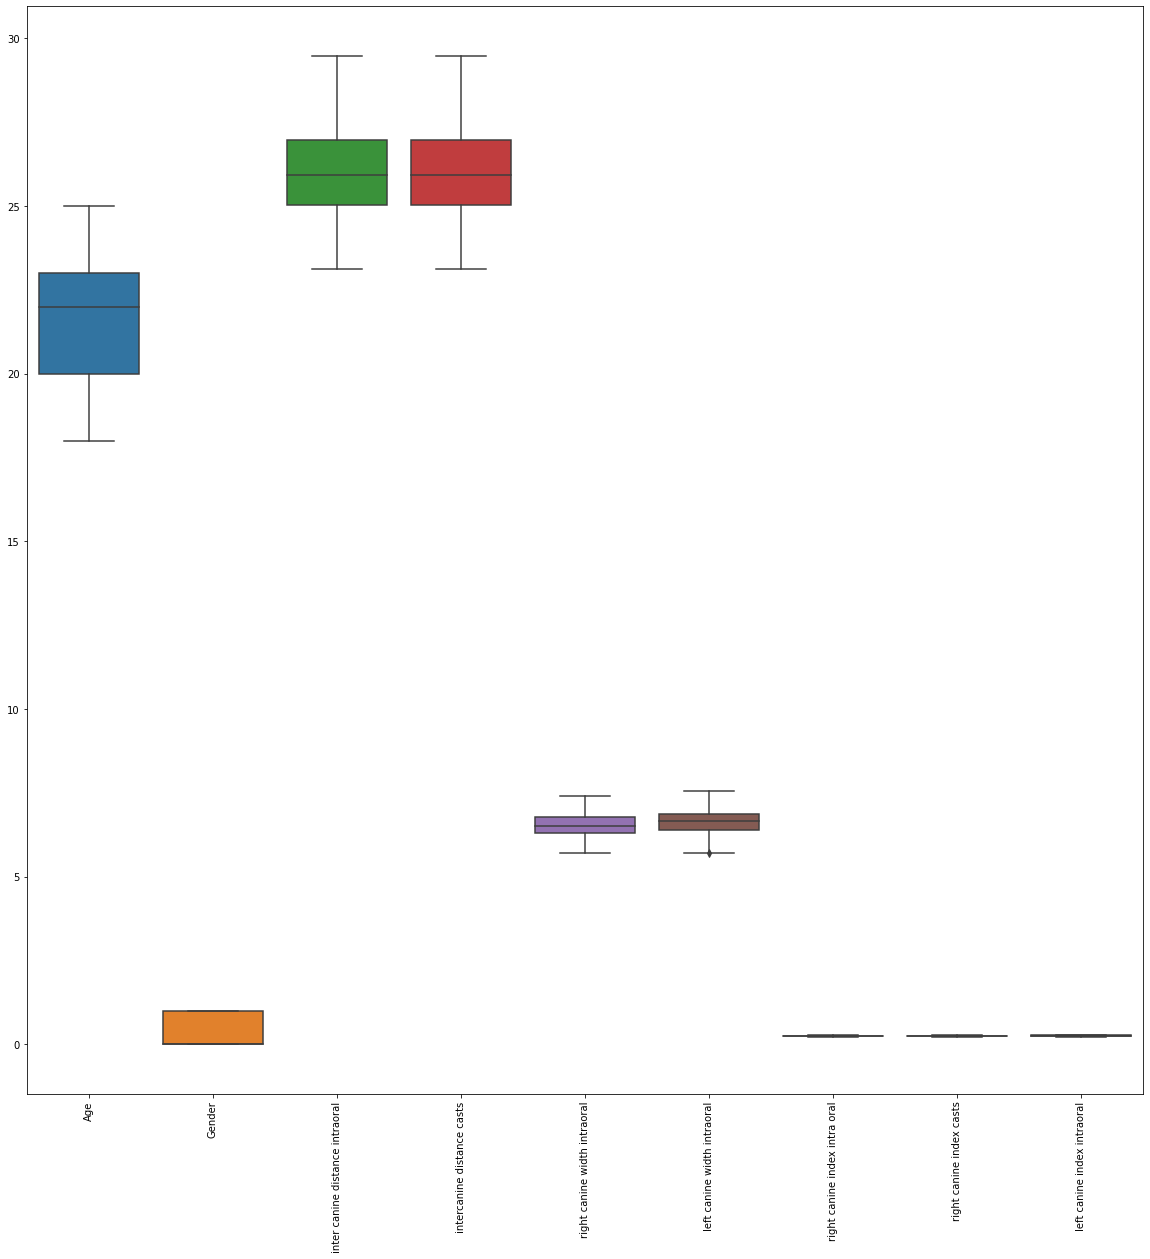

In [53]:
plt.figure(figsize=(20,20)) 
sns.boxplot(data=DF)
plt.xticks(rotation=90)

In [54]:
X = DF.drop('Gender',axis = 1)
y = DF['Gender']

In [55]:
X.shape

(1014, 8)

In [56]:
y.shape

(1014,)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [58]:
X_train.shape

(760, 8)

In [59]:
X_test.shape

(254, 8)

In [60]:
y_train.shape

(760,)

In [61]:
y_test.shape

(254,)

In [62]:
scaler = StandardScaler()
scaler

StandardScaler()

In [63]:
train_vars = X_train.columns


X_train[train_vars] = scaler.fit_transform(X_train[train_vars])
X_test[train_vars] = scaler.fit_transform(X_test[train_vars])

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [64]:
X_train.head() #The values for variables should be scaled between -1 to 1.

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,left canine width intraoral,right canine index intra oral,right canine index casts,left canine index intraoral
868,-0.311736,-1.306066,-1.307239,-0.199991,0.837722,1.116140,1.121704,2.571718
160,-0.311736,1.045920,1.075871,-0.679196,0.093114,-1.784625,-1.785284,-1.014531
990,-0.311736,1.261187,1.259187,1.491324,1.210026,0.453108,0.457250,0.122572
414,0.169808,-0.947288,-0.948577,0.194650,-0.107358,1.199019,1.204761,0.909798
281,1.132895,1.524291,1.522206,1.463135,1.210026,0.121592,0.125022,-0.314775


In [65]:
# Using SKLEARN module for random forest
from sklearn.ensemble import RandomForestClassifier 

# Fit and predict
naive_rfc = RandomForestClassifier() 
naive_rfc.fit(X_train, y_train) 
naive_test_preds = naive_rfc.predict(X_test)


# For the performance let's use some metrics from SKLEARN module
from sklearn.metrics import accuracy_score, precision_score, recall_score
  
print("The accuracy is {}".format(accuracy_score(y_test, naive_test_preds) )) 
print("The precision is {}".format(precision_score(y_test, naive_test_preds)))
print("The recall is {}".format(recall_score(y_test, naive_test_preds) )) 

The accuracy is 0.8503937007874016
The precision is 0.7927927927927928
The recall is 0.8543689320388349
